# Определение выгодного тарифа для телеком компании

**Цель исследования:** - определить какой тарифный план ("Смарт" или "Ультра") приносит больше денег.

**Описание тарифов**

**Тариф "Смарт"**
1. Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
 * минута разговора: 3 рубля
 * сообщение: 3 рубля
 * 1 Гб интернет-трафика: 200 рублей
 
**Тариф "Ультра"**
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
 * минута разговора: 1 рубль
 * сообщение: 1 рубль
 * 1 Гб интернет-трафика: 150 рублей


## Обзор данных

In [34]:
#импортируем необходимые библиотеки
import pandas as pd 
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import math 
import calendar
import seaborn as sns
from scipy import stats as st

In [35]:
#откроем файлы
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv',index_col=[0])
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

## Предобработка данных

### Проанализируем и подготовим данные

In [36]:
#создадим универсальную функцию, которая на входе будет принимать датафрейм, а на выходе будет выводить нужные значения
def uni_function(df):
    display(df.info())
    display(df.head())
    display(df.isna().mean())
    display(df.describe())
    display(df.duplicated().sum())

### Calls

In [37]:
uni_function(df_calls) #изучим датасет df_calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


id          0.00
call_date   0.00
duration    0.00
user_id     0.00
dtype: float64

,duration,user_id
count,"202,607.00","202,607.00"
mean,6.76,"1,253.94"
std,5.84,144.72
min,0.00,"1,000.00"
25%,1.30,"1,126.00"
50%,6.00,"1,260.00"
75%,10.70,"1,379.00"
max,38.00,"1,499.00"


0

In [38]:
#округлим значения столбца duration до большего целого и преобразуем тип данных 
def ceil_value(value):
    return math.ceil(value)
df_calls['duration'] = df_calls['duration'].apply(ceil_value)
#преобразуем тип данных столбца call_date
df_calls['call_date'] = pd.to_datetime(
    df_calls['call_date'], format='%Y-%m-%d'
)
#df_calls.info()
#дабавим столбец 'month'  с номером месяца.
df_calls['month_number'] = pd.DatetimeIndex(df_calls['call_date']).month

#присвоим номеру месяца название
df_calls['month_name'] = df_calls['month_number'].apply(lambda x: calendar.month_name[x])
display(df_calls)

,id,call_date,duration,user_id,month_number,month_name
0,1000_0,2018-07-25,0,1000,7,July
1,1000_1,2018-08-17,0,1000,8,August
2,1000_2,2018-06-11,3,1000,6,June
3,1000_3,2018-09-21,14,1000,9,September
4,1000_4,2018-12-15,6,1000,12,December
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12,December
202603,1499_216,2018-10-18,19,1499,10,October
202604,1499_217,2018-11-10,11,1499,11,November
202605,1499_218,2018-10-06,5,1499,10,October


**Вывод по датафрейму Calls**

Согласно правилам телеком-компании «Мегалайн» секунды всегда округляются до минут и каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. Зная это и проанализировав данные, мы обнаружили, что данные в столбце 'duration' не отвечают данным условиям. Для решения данной проблемы мы преобразовали значения столбца в тип int64, используя функцию для округления в большую сторону math.ceil.

Также мы обнаружили, что формат даты не соответсвует правильному типу данных, поэтому мы преобразовали данные столбца 'call_date' в тип данных datetime64.

###  Internet

In [39]:
uni_function(df_internet) #изучим датасет df_internet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,"1,052.81",2018-09-07,1000
2,1000_2,"1,197.26",2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


id             0.00
mb_used        0.00
session_date   0.00
user_id        0.00
dtype: float64

,mb_used,user_id
count,"149,396.00","149,396.00"
mean,370.19,"1,252.10"
std,278.30,144.05
min,0.00,"1,000.00"
25%,138.19,"1,130.00"
50%,348.01,"1,251.00"
75%,559.55,"1,380.00"
max,"1,724.83","1,499.00"


0

In [40]:
#преобразуем тип данных столбца session_date
df_internet['session_date'] = pd.to_datetime(
    df_internet['session_date'], format='%Y-%m-%d')

#дабавим столбец 'month'  с номером месяца.
df_internet['month_number'] = pd.DatetimeIndex(df_internet['session_date']).month
#присвоим номеру месяца название
df_internet['month_name'] = df_internet['month_number'].apply(lambda x: calendar.month_name[x])

#добавим столбец gb_used(перевод Мб в Гб)
df_internet['gb_used'] = df_internet['mb_used']/1024
display(df_internet)

,id,mb_used,session_date,user_id,month_number,month_name,gb_used
0,1000_0,112.95,2018-11-25,1000,11,November,0.11
1,1000_1,"1,052.81",2018-09-07,1000,9,September,1.03
2,1000_2,"1,197.26",2018-06-25,1000,6,June,1.17
3,1000_3,550.27,2018-08-22,1000,8,August,0.54
4,1000_4,302.56,2018-09-24,1000,9,September,0.30
...,...,...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10,October,0.31
149392,1499_153,490.13,2018-12-14,1499,12,December,0.48
149393,1499_154,0.00,2018-10-27,1499,10,October,0.00
149394,1499_155,"1,246.32",2018-11-26,1499,11,November,1.22


**Вывод по датафрейму internet**

После анализа данных мы определили, что в столбцах нет пропущенных значений, но есть ошибки в типе и в способе записи данных. Данные в столбце mb_used мы округлили до большего целого, а так же для столбца session_date изменили тип данных, с object на datetime64.

Т.к оплата за тариф осуществляется в Гб, мы добавили новый столбец 'gb_used', куда поместили значения столбца 'mb_used' в Гб, округленные до большего целого значения.

### Messages

In [41]:
uni_function(df_messages) #изучим датасет df_messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


id             0.00
message_date   0.00
user_id        0.00
dtype: float64

,user_id
count,"123,036.00"
mean,"1,256.99"
std,143.52
min,"1,000.00"
25%,"1,134.00"
50%,"1,271.00"
75%,"1,381.00"
max,"1,499.00"


0

In [42]:
#преобразуем тип данных столбца message_date
df_messages['message_date'] = pd.to_datetime(
    df_messages['message_date'], format='%Y-%m-%d')
#дабавим столбец 'month'  с номером месяца.
df_messages['month_number'] = pd.DatetimeIndex(df_messages['message_date']).month
#присвоим номеру месяца название
df_messages['month_name'] = df_messages['month_number'].apply(lambda x: calendar.month_name[x])
#display(df_messages.head())

**Вывод по датафрейму messages**

После анализа данных мы определили, что в столбцах нет пропущенных значений, но есть ошибки в типе данных. Поэтому для столбца message_date изменили тип данных, с object на datetime64.

### Tariffs

In [43]:
uni_function(df_tariffs) #изучим датасет df_tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


messages_included       0.00
mb_per_month_included   0.00
minutes_included        0.00
rub_monthly_fee         0.00
rub_per_gb              0.00
rub_per_message         0.00
rub_per_minute          0.00
tariff_name             0.00
dtype: float64

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.00,2.00,2.00,2.00,2.00,2.00,2.00
mean,525.00,"23,040.00","1,750.00","1,250.00",175.00,2.00,2.00
std,671.75,"10,861.16","1,767.77",989.95,35.36,1.41,1.41
min,50.00,"15,360.00",500.00,550.00,150.00,1.00,1.00
25%,287.50,"19,200.00","1,125.00",900.00,162.50,1.50,1.50
50%,525.00,"23,040.00","1,750.00","1,250.00",175.00,2.00,2.00
75%,762.50,"26,880.00","2,375.00","1,600.00",187.50,2.50,2.50
max,"1,000.00","30,720.00","3,000.00","1,950.00",200.00,3.00,3.00


0

In [44]:
#добавим столбец gb_per_month_included(перевод Мб в Гб)
df_tariffs['gb_per_month_included'] = df_tariffs['mb_per_month_included']/1024
df_tariffs['gb_per_month_included'] = df_tariffs['gb_per_month_included'].astype('int')
display(df_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


**Вывод по датафрейму Tariffs**

Пропущенных значений не обнаружено, ошибок не выявлено.
Т.к оплата за тариф осуществляется в Гб, мы добавили новый столбец 'gb_per_month_included', куда поместили значения столбца 'mb_per_month_included' в Гб.

### Users

In [45]:
uni_function(df_users) #изучим датасет df_users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


user_id      0.00
age          0.00
churn_date   0.92
city         0.00
first_name   0.00
last_name    0.00
reg_date     0.00
tariff       0.00
dtype: float64

,user_id,age
count,500.00,500.00
mean,"1,249.50",46.59
std,144.48,16.67
min,"1,000.00",18.00
25%,"1,124.75",32.00
50%,"1,249.50",46.00
75%,"1,374.25",62.00
max,"1,499.00",75.00


0

In [46]:
#преобразуем тип данных столбца churn_date
df_users['churn_date'] = pd.to_datetime(
    df_users['churn_date'], format='%Y-%m-%d')

#преобразуем тип данных столбца reg_date
df_users['reg_date'] = pd.to_datetime(
    df_users['reg_date'], format='%Y-%m-%d')
display(df_users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


**Вывод по датафрейму Users**

Доля пропусков в столбце churn_date составила меньше 1%, мы можем пренебречь этими данными, однако мы знаем, что если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Значит преобразовывать столбце мы никак не будем. Для столбцов churn_date и reg_date мы изменили тип данных, с object на datetime64.


### Подготовка пользовательских данных
* Количество сделанных звонков и израсходованных минут разговора по месяцам
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам

#### Подстчет количества звонков 

In [47]:
#посчитаем количество звонков и израсходованные минуты
calls_count = df_calls.groupby(['user_id','month_name']).agg({'id':'count', 'duration':'sum'}).reset_index()
calls_count.columns = ['user_id', 'month_name', 'calls_count', 'used_time']
display(calls_count)

,user_id,month_name,calls_count,used_time
0,1000,August,52,408
1,1000,December,46,333
2,1000,July,47,340
3,1000,June,43,172
4,1000,May,22,159
...,...,...,...,...
3169,1498,September,59,471
3170,1499,December,69,492
3171,1499,November,74,612
3172,1499,October,68,449


#### Подстчет количества смс

In [48]:
#посчитаем количество отправленых смс по месяцам
sms_count = df_messages.groupby(['user_id','month_name']).agg({'id':'count'}).reset_index()
sms_count.columns = ['user_id', 'month_name', 'sms_count']
display(sms_count)

,user_id,month_name,sms_count
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22
...,...,...,...
2712,1498,September,44
2713,1499,December,66
2714,1499,November,59
2715,1499,October,48


#### Подстчет расхода трафика

In [49]:
#посчитаем объем израсходованного интернет-трафика по месяцам
internet_count = df_internet.groupby(['user_id','month_name']).gb_used.sum().reset_index()
internet_count.columns = ['user_id', 'month_name', 'used_traffic']
#округлим значения в столбце used_traffic
internet_count['used_traffic'] = internet_count['used_traffic'].apply(ceil_value)
display(internet_count)                       

,user_id,month_name,used_traffic
0,1000,August,14
1,1000,December,10
2,1000,July,14
3,1000,June,23
4,1000,May,3
...,...,...,...
3198,1498,September,22
3199,1499,December,13
3200,1499,November,18
3201,1499,October,18


#### Расчет помесячной выручки

In [50]:
#Объединим несколько таблиц в одну
summary_table = calls_count.merge(sms_count, on = ['user_id', 'month_name'], how = 'outer').merge(internet_count, on = ['month_name','user_id'], how = 'outer')
#заменим Nan на нули
summary_table = summary_table.fillna(0)
#Объединим несколько таблиц в одну
summary_table = summary_table.merge(df_users[['user_id', 'city', 'tariff']] , on ='user_id' ,how = 'left')
summary_table = summary_table.merge(df_tariffs, left_on =['tariff'], right_on = ['tariff_name'], how = 'outer')

display(summary_table.head())

,user_id,month_name,calls_count,used_time,sms_count,used_traffic,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,1000,August,52.00,408.00,81.00,14.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,30
1,1000,December,46.00,333.00,70.00,10.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,30
2,1000,July,47.00,340.00,75.00,14.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,30
3,1000,June,43.00,172.00,60.00,23.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,30
4,1000,May,22.00,159.00,22.00,3.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,30


In [51]:
#создадим функцию для подсчета выручки
def income(row):
    calls_price = max(row.used_time - row.minutes_included,0)*row.rub_per_minute
    messages_price = max(row.sms_count - row.messages_included,0)*row.rub_per_message
    traffic_price = max(row.used_traffic-row.gb_per_month_included,0)*row.rub_per_gb
    return row.rub_monthly_fee + calls_price + messages_price + traffic_price
summary_table['income'] = summary_table.apply(income, axis=1)
# отсортируем полученные данные
final_df = summary_table[['user_id', 'city', 'month_name', 'used_time', 'sms_count', 'used_traffic', 'tariff_name', 'income']].sort_values(by = 'user_id')
display(final_df)

,user_id,city,month_name,used_time,sms_count,used_traffic,tariff_name,income
0,1000,Краснодар,August,408.00,81.00,14.00,ultra,"1,950.00"
1,1000,Краснодар,December,333.00,70.00,10.00,ultra,"1,950.00"
2,1000,Краснодар,July,340.00,75.00,14.00,ultra,"1,950.00"
3,1000,Краснодар,June,172.00,60.00,23.00,ultra,"1,950.00"
4,1000,Краснодар,May,159.00,22.00,3.00,ultra,"1,950.00"
...,...,...,...,...,...,...,...,...
3200,1498,Владикавказ,August,400.00,62.00,24.00,smart,"2,386.00"
3207,1499,Пермь,September,70.00,11.00,2.00,smart,550.00
3204,1499,Пермь,December,492.00,66.00,13.00,smart,598.00
3206,1499,Пермь,October,449.00,48.00,18.00,smart,"1,150.00"


## Анализ и описание данных

Определим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы для каждого показателя и опишем распределения.

In [52]:
#округлим до двух десятичных знаков все значения в датафрейме
pd.options.display.float_format = '{:,.2f}'.format
#создадим сводную таблицу для описания поведения клиентов оператора
pd.pivot_table(final_df,
               index=['tariff_name'], 
               values = ['used_time', 'sms_count', 'used_traffic'],
               aggfunc= ['mean', 'var', 'std'])


mean                              var             \
            sms_count used_time used_traffic sms_count  used_time   
tariff_name                                                         
smart           33.38    417.93        16.33    796.81  36,219.32   
ultra           49.36    526.62        19.49  2,285.27 100,873.63   

                               std                         
            used_traffic sms_count used_time used_traffic  
tariff_name                                                
smart              33.03     28.23    190.31         5.75  
ultra              97.09     47.80    317.61         9.85

**Вывод**
Исходя из полученных данных мы можем сделать следующие выводы:
 - тариф Smart
1. В среднем пользователи отправляют 34 сообщения из предоставленных 50; стандартное отклонение составило 29 сообщений. 
2. Количество потраченых минут в среднем составляет 418 из предоставленных 500; стандартное отклонение составило 191 минуту.
3. Среднее значение израсходованного трафика составляет 16 Гб, когда как тариф предполагает бесплатное использование 15 Гб. Лимит интернет трафика привышен незначительно.


 - тариф Ultra
1. В среднем пользователи отправляют 50 сообщения из предоставленных 1000; стандартное отклонение составило 48. 
2. Количество потраченых минут в среднем составляет 527 из предоставленных 3000; стандартное отклонение составило 318.
3. Среднее значение израсходованного трафика составляет 20 Гб, предоставляемый тарифом интернет трафик составляет 30 Гб. Лимит интернет-трафика не превышен.

Изучив полученные данные мы можем сделать вывод о том, что пользоватили тарифа Smart превышают лимит интернет-трафика, а значит им приходится доплачивать, а значит этот показатель напрямую влияет на выручку крмпании.
Также стоит отметить, что величины стандартных отклонений для данных о сообщениях и интернет-трафике очень большие, это значит, что разброс значений большой.


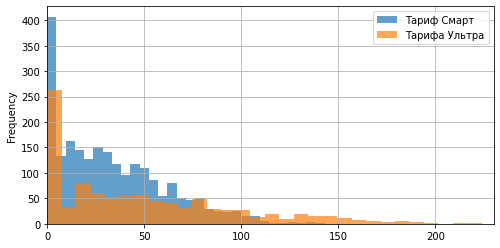

In [53]:
#Построим гистограммы распредения для каждой выборки
#Построем гистограмму для параметра sms_count для двухтарифов

fig, ax = plt.subplots(
    nrows=1, ncols=1,
    figsize=(8, 4))
final_df[final_df['tariff_name']=='smart'].plot(ax=ax, y='sms_count', kind = 'hist',xlim=(0, 230), alpha=0.7, grid=True, bins=30, label='Тариф Смарт')
final_df[final_df['tariff_name']=='ultra'].plot(ax=ax, y='sms_count', kind = 'hist',xlim=(0, 230), alpha=0.7, grid=True, bins=30, label='Тарифа Ультра') 
plt.show()

**Вывод**

Из гистограмм мы видим, что в обоих тарифах присутствует большое количество клиентов, которые совсем не пользуются предоставленным количеством смс.Также мы видим, что обе гистограммы имеют распределение Пуассона и имеют небольшое смещение вправо, т.к медиана меньше среднего.

count   3,214.00
mean      451.24
std       241.91
min         0.00
25%       282.00
50%       443.00
75%       589.00
max     1,673.00
Name: used_time, dtype: float64

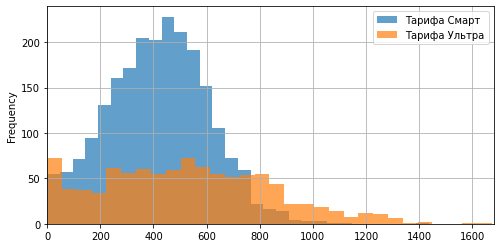

In [54]:
#Построем гистограмму для параметра used_time(потраченое на звонки время)
display(final_df.used_time.describe())
fig, ax = plt.subplots(
    nrows=1, ncols=1,
    figsize=(8, 4)
)
final_df[final_df['tariff_name']=='smart'].plot(ax=ax, y='used_time', kind = 'hist',xlim=(0,1680), grid=True, alpha=0.7, bins=30, label='Тарифа Смарт')
final_df[final_df['tariff_name']=='ultra'].plot(ax=ax, y='used_time', kind = 'hist',xlim=(0,1680), grid=True, alpha=0.7, bins=30, label='Тарифа Ультра')
plt.show()

**Вывод**

На гистограмме тарифа Ультра, видно, что существует большое количество звонков с нулевой продолжительностью. Как мы знаем,это пропущенные звонки. Однако это немного искажает нашу гистограмму. Если не учитывать данные о пропущенных звонках, мы можем сказать, что распределение у тарифа Ультра близко к нормальному, однако стоит отметить, что оно несколько размытое.
У тарифа Смарт распределение нормальное.

count   3,214.00
mean       17.30
std         7.40
min         0.00
25%        13.00
50%        17.00
75%        21.00
max        49.00
Name: used_traffic, dtype: float64

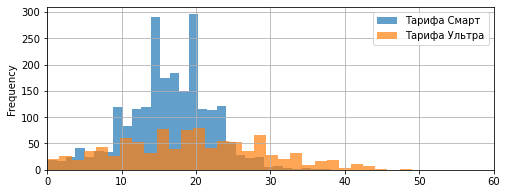

In [55]:
#Построем гистограмму для параметра used_time(потраченое на звонки время)
display(final_df.used_traffic.describe())
fig, ax = plt.subplots(figsize=(8, 3))

final_df[final_df['tariff_name']=='smart'].plot(ax=ax, y='used_traffic', kind = 'hist',xlim=(0,60), alpha=0.7, grid=True, bins=30, label='Тарифа Смарт')
final_df[final_df['tariff_name']=='ultra'].plot(ax=ax, y='used_traffic', kind = 'hist',xlim=(0,60), alpha=0.7, grid=True, bins=30, label='Тарифа Ультра')
plt.show()

**Вывод**

На гистограммах видно, что оба тарифа имеют нормальное распределение, однако у тарифа Смарт оно немного смещено вправо.

In [56]:
#создадим сводную таблицу для оценки выручки каждого тарифа
pd.pivot_table(final_df,
               index=['tariff_name'], 
               values = ['income'],
               aggfunc= ['mean', 'var', 'std'])

,mean,var,std
,income,income,income
tariff_name,,,
smart,"1,289.97","669,785.71",818.40
ultra,"2,070.15","141,516.75",376.19


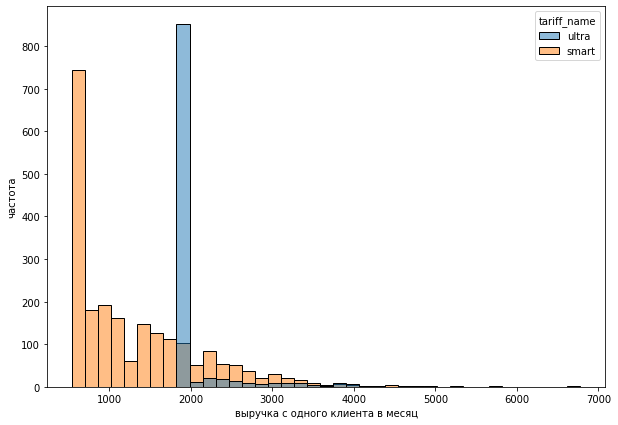

In [57]:
#Построем гистограммы для параметра income(выручка)
plt.figure(figsize = (10, 7))
sns.histplot(data=final_df, x='income', hue='tariff_name')
plt.xlabel('выручка с одного клиента в месяц')
plt.ylabel('частота')
plt.show()

**Общий вывод**

Изучив гистограммы, мы можем сказать, что у тарифа Смарт больше клиентов, чем у тарифа Ультра. Такой вывод нам позволяет сделать высота "колокола" гистограммы.
Также из гистограммы с данными о выручке с одного клиента в месяц видно, что ежемесячный доход от клиентов больше на тарифе Ультра.

## Проверка гипотез и пояснения

 Проверим две гипотезы:
 * средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
 * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Формулировка гипотезы №1**

Типичные статистические гипотезы касаются средних значений
генеральных совокупностей и звучат так:
 * среднее генеральной совокупности равно конкретному значению;
 * средние двух генеральных совокупностей равны между собой.

H₀ всегда формулируется так, чтобы использовать знак равенства.В нашем случае нам подходит второй вариант. 

**Нулевая гипотеза H₀ будет звучать так:** средняя выручка с пользователей тарифов "Ультра" и "Смарт" равны.

Исходя из H₀ формулируется альтернативная гипотеза H₁.

**Альтернативная гипотеза H₁:** средняя выручка с пользователей тарифов "Ультра" и "Смарт" различаются.

**критический уровень статистической значимости** alpha=0.05

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2,equal_var). 

In [58]:
#проверим размер выборки и дисперсию
for tariff in ['ultra', 'smart']:
    print(f'Размер выборки тарифа {tariff}: {len(final_df[final_df.tariff_name == tariff])}')
    print(f'Дисперсия выборки тарифа {tariff}: {np.var(final_df[final_df.tariff_name == tariff].income)}')
    


Размер выборки тарифа ultra: 985
Дисперсия выборки тарифа ultra: 141373.07325620344
Размер выборки тарифа smart: 2229
Дисперсия выборки тарифа smart: 669485.2209234245


Примем, что equal_var = False, т.к.выборки разного размера и дисперсии у совокупностей не одинаковые.

In [59]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу
results = st.ttest_ind(
    final_df[final_df.tariff_name == 'ultra'].income, 
    final_df[final_df.tariff_name == 'smart'].income,
    equal_var = False) 
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


**Вывод**

Мы отвергаем нулевую гипотезу, а значит альтернативная гипотеза оказалась верной. Средняя выручка с пользователей тарифов "Смарт" и "Ультра" различаются.

**Формулировка гипотезы №2**

Нулевая гипотеза H₀ будет звучать так: средняя выручка пользователей из Москвы и пользователей из других регионов равны.

Альтернативная гипотеза H₁: средняя выручка пользователей из Москвы и пользователей из других регионов различаются.

критический уровень статистической значимости alpha=0.05  

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2,equal_var). 

In [60]:
#определим размер выборки и дисперсию
print(f'Размер выборки пользователей из Москвы: {len(final_df[final_df.city =="Москва"])}')
print(f'Дисперсия выборки пользователей из Москвы: {np.var(final_df[final_df.city == "Москва"].income)}')
print(f'Размер выборки пользователей из Москвы: {len(final_df[final_df.city !="Москва"])}')
print(f'Дисперсия выборки пользователей из Москвы: {np.var(final_df[final_df.city != "Москва"].income)}')

Размер выборки пользователей из Москвы: 611
Дисперсия выборки пользователей из Москвы: 564710.7117467273
Размер выборки пользователей из Москвы: 2603
Дисперсия выборки пользователей из Москвы: 653886.3270894173


Примем, что equal_var = False, т.к.выборки разного размера и дисперсии у совокупностей не одинаковые.

In [61]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу
results = st.ttest_ind(
    final_df[final_df.city == 'Москва'].income, 
    final_df[final_df.tariff_name != 'Москва'].income,
    equal_var = False) 
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5989670526299276
Не получилось отвергнуть нулевую гипотезу


**Вывод**

По результатам тестирования мы не можем опровергнуть нулевую гипотезу,а значит гипотеза о том, что средняя выручка пользователей из Москвы и пользователей из других регионов равны не подтвердилась.

## Общий вывод

В ходе данного проекта мы:
 - изучили данные 500 пользователей «Мегалайна» с помощью 5 датасетов;
 - для дальнейшего анализа были откорректированны типы данных некоторых столбцов и осуществлен перевод значений трафика в Гб, а длительность звонка в минуты;
 - был сделан анализ двух тарифов (Смарт и Ультра);
 - мы рассчитали помесячную вручку для каждого пользователя и определили, что что ежемесячный доход от клиентов больше на тарифе Ультра;
 - в результате исследования мы смогли опровергнуть гипотезу о том, что средняя выручка с пользователей тарифов "Ультра" и "Смарт" равны;
 - также мы рассмотрели гипотезу о том, что средняя выручка пользователей из Москвы и пользователей из других регионов равны и нам не удалось подтвердить эту гипотезу.
 
Рекламный бюджет лучше скорректировать для тарифа Ультра,т.к. ежемесячная выручка для каждого пользователя выше именно для этого тарифа.
